In [78]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.utils.vis_utils import plot_model
plt.rcParams['figure.figsize'] = (12,12)

In [79]:
def print_loaded_images(X_train, Y_train):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_train[i].reshape(28,28), interpolation='none')
        plt.title("Class {}".format(Y_train[i]))

In [80]:
def load_fresh_data():
    # load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # reshape the data which has images with 28 by 28 pixels to have a single channel
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # Normalize the Pixel values
    X_train /= 255
    X_test /= 255    
    
    # Converting labels to catagorical variable 
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    
    return X_train, X_test, Y_train, Y_test, y_test

In [81]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [82]:
def train_model(model, X_train, Y_train, epochs=4):
    model.fit(X_train, Y_train,
          batch_size=128, epochs=epochs,
        verbose=1,
          validation_data=(X_test, Y_test))
    return model

In [83]:
def predict_using_model(model, X_test, y_test):
    predicted_classes = model.predict_classes(X_test)
    
    # get the correct and incorrect predictions seperated so that it can be printed later
    correct_indices = np.nonzero(predicted_classes == y_test)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    
    return predicted_classes, correct_indices, incorrect_indices

In [95]:
def plot_image(predicted_classes, indices, y_test ):
    plt.figure()
    for i, val in enumerate(indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[val].reshape(28,28), interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[val], y_test[val]))

Traning And Testing Keras Image Clasifire


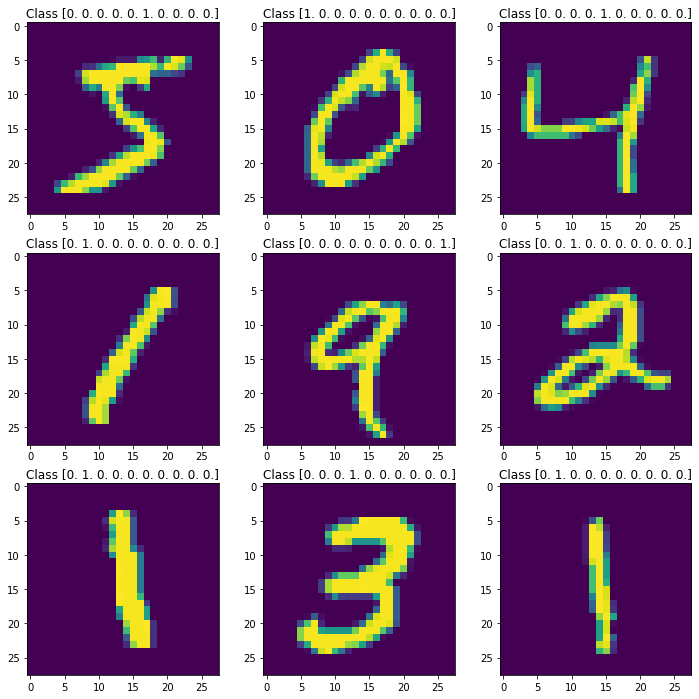

In [93]:
X_train, X_test, Y_train, Y_test, y_test = load_fresh_data()
print_loaded_images(X_train, Y_train)

In [86]:
model = get_model()
model = train_model(model, X_train, Y_train)
predicted_classes, correct_indices, incorrect_indices = predict_using_model(model, X_test, y_test)

Epoch 1/4
469/469 [==============================] - 23s 48ms/step - loss: 0.2532 - accuracy: 0.9250 - val_loss: 0.1255 - val_accuracy: 0.9640
Epoch 2/4
469/469 [==============================] - 23s 48ms/step - loss: 0.1017 - accuracy: 0.9711 - val_loss: 0.0794 - val_accuracy: 0.9754
Epoch 3/4
469/469 [==============================] - 23s 48ms/step - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.0674 - val_accuracy: 0.9797
Epoch 4/4
469/469 [==============================] - 23s 49ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0639 - val_accuracy: 0.9789


plot image with correct indices

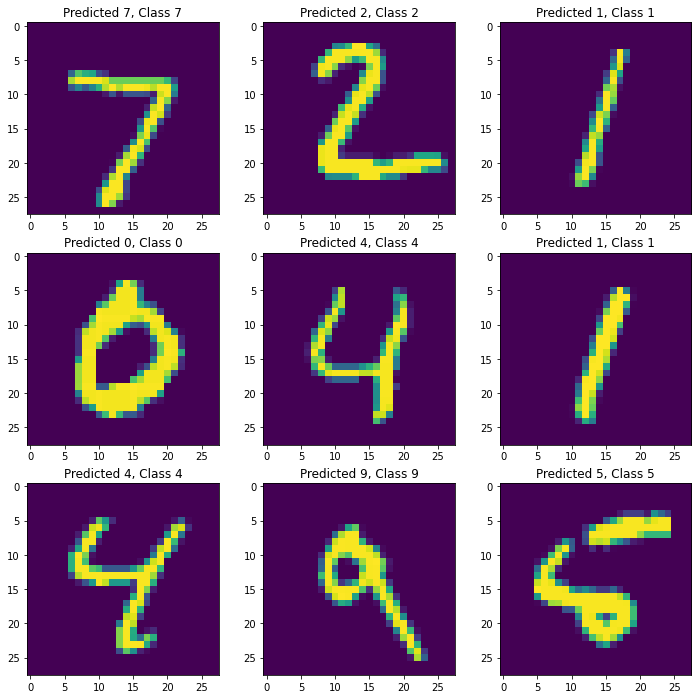

In [96]:
plot_image(predicted_classes, correct_indices, y_test )

plot image with incorrect indices

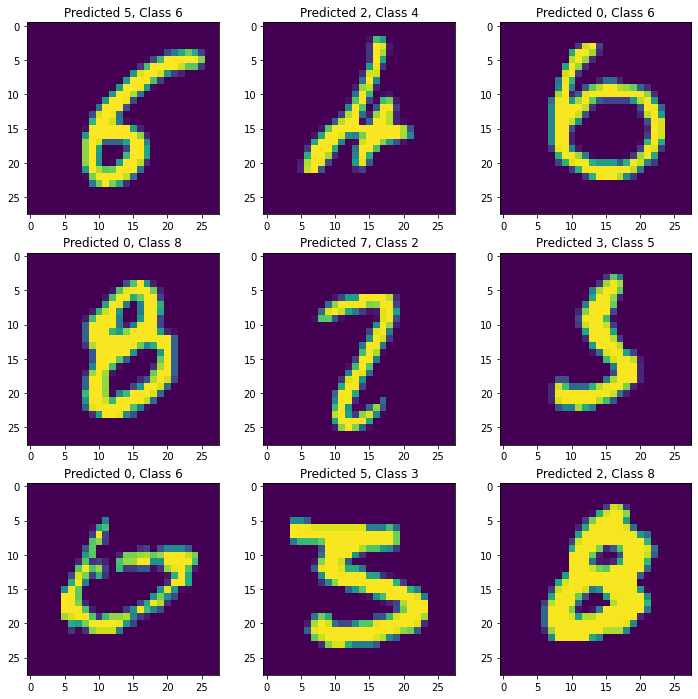

In [97]:
plot_image(predicted_classes, incorrect_indices, y_test )

In [89]:
print ("Test Accuracy : " + str(len(correct_indices)/(len(predicted_classes))))
model.summary()

Test Accuracy : 0.9789
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


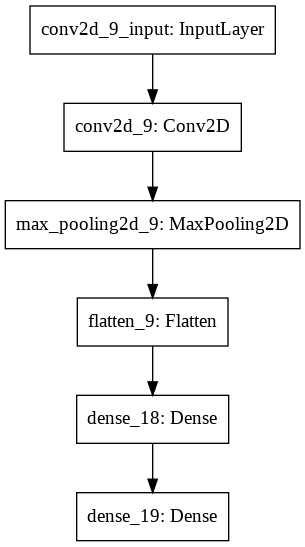

In [90]:
plot_model(model, to_file='model.png')